<a href="https://colab.research.google.com/github/jcmachicao/pucp_termodinamica/blob/main/pucp_termo2__refrigerant_cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install CoolProp if needed
!pip install CoolProp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 47.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

In [3]:
# Define refrigerant
fluid = 'R134a'

# Isentropic efficiency of the compressor (0.75 typical)
eta_isentropic = 0.75

# Set pressures [Pa]
P_evap = 300e3       # Evaporator pressure (low pressure)
P_cond = 900e3       # Condenser pressure (high pressure)

# Evaporator outlet (State 1) - saturated vapor
T1 = PropsSI('T','P',P_evap,'Q',1,fluid)
h1 = PropsSI('H','P',P_evap,'Q',1,fluid)
s1 = PropsSI('S','P',P_evap,'Q',1,fluid)

# Compressor isentropic outlet (State 2s)
h2s = PropsSI('H','P',P_cond,'S',s1,fluid)

# Actual outlet enthalpy using isentropic efficiency
h2 = h1 + (h2s - h1) / eta_isentropic
T2 = PropsSI('T','P',P_cond,'H',h2,fluid)
s2 = PropsSI('S','P',P_cond,'H',h2,fluid)

# Condenser outlet (State 3) - saturated liquid
T3 = PropsSI('T','P',P_cond,'Q',0,fluid)
h3 = PropsSI('H','P',P_cond,'Q',0,fluid)
s3 = PropsSI('S','P',P_cond,'Q',0,fluid)

# After expansion valve (State 4) - isenthalpic process
h4 = h3
T4 = PropsSI('T','P',P_evap,'H',h4,fluid)
s4 = PropsSI('S','P',P_evap,'H',h4,fluid)

# For diagram plotting
states = {
    '1': {'P': P_evap, 'T': T1, 'h': h1, 's': s1},
    '2': {'P': P_cond, 'T': T2, 'h': h2, 's': s2},
    '3': {'P': P_cond, 'T': T3, 'h': h3, 's': s3},
    '4': {'P': P_evap, 'T': T4, 'h': h4, 's': s4},
}

# Print basic state data
for i in ['1', '2', '3', '4']:
    st = states[i]
    print(f"State {i}: T = {st['T']:.2f} K, P = {st['P']/1e5:.2f} bar, h = {st['h']/1000:.2f} kJ/kg, s = {st['s']/1000:.4f} kJ/kg.K")

State 1: T = 273.82 K, P = 3.00 bar, h = 399.00 kJ/kg, s = 1.7267 kJ/kg.K
State 2: T = 319.82 K, P = 9.00 bar, h = 429.42 kJ/kg, s = 1.7508 kJ/kg.K
State 3: T = 308.68 K, P = 9.00 bar, h = 249.78 kJ/kg, s = 1.1695 kJ/kg.K
State 4: T = 273.82 K, P = 3.00 bar, h = 249.78 kJ/kg, s = 1.1818 kJ/kg.K


In [4]:
# Extract properties for plotting
T_list = [states[str(i)]['T'] for i in range(1, 5)] + [states['1']['T']]
s_list = [states[str(i)]['s']/1000 for i in range(1, 5)] + [states['1']['s']/1000]
h_list = [states[str(i)]['h']/1000 for i in range(1, 5)] + [states['1']['h']/1000]
P_list = [states[str(i)]['P']/1e5 for i in range(1, 5)] + [states['1']['P']/1e5]

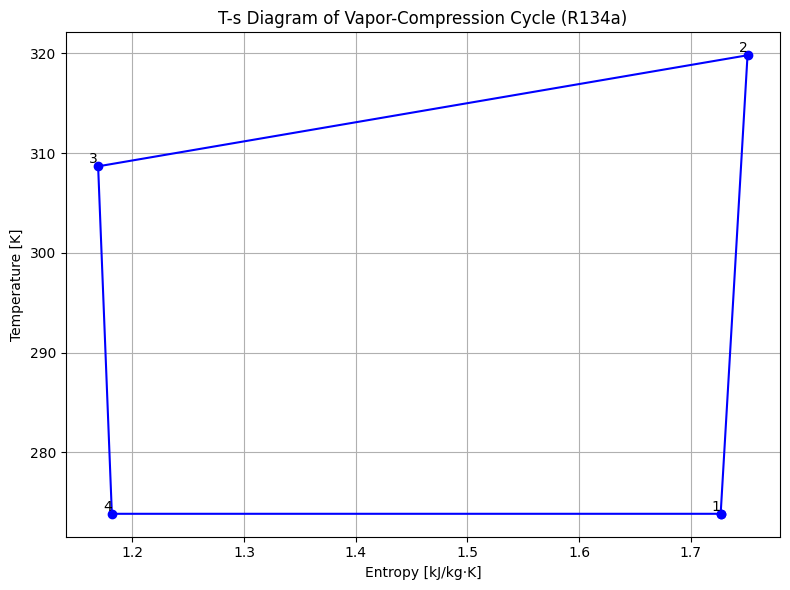

In [5]:
# Plot T-s diagram
plt.figure(figsize=(8, 6))
plt.plot(s_list, T_list, marker='o', linestyle='-', color='b')
for i, (s, T) in enumerate(zip(s_list[:-1], T_list[:-1]), 1):
    plt.text(s, T, f'{i}', ha='right', va='bottom')
plt.xlabel('Entropy [kJ/kg·K]')
plt.ylabel('Temperature [K]')
plt.title('T-s Diagram of Vapor-Compression Cycle (R134a)')
plt.grid(True)
plt.tight_layout()
plt.show()

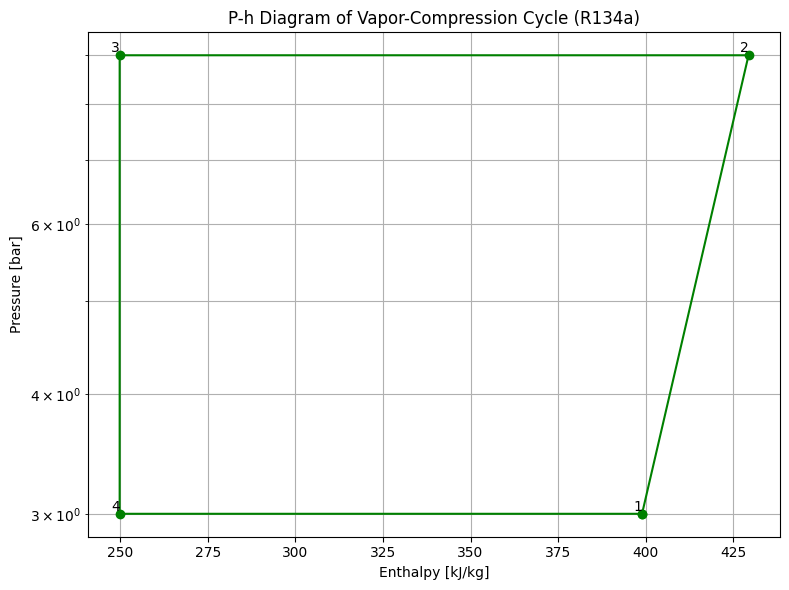

In [6]:
# Plot P-h diagram
plt.figure(figsize=(8, 6))
plt.plot(h_list, P_list, marker='o', linestyle='-', color='g')
for i, (h, P) in enumerate(zip(h_list[:-1], P_list[:-1]), 1):
    plt.text(h, P, f'{i}', ha='right', va='bottom')
plt.xlabel('Enthalpy [kJ/kg]')
plt.ylabel('Pressure [bar]')
plt.title('P-h Diagram of Vapor-Compression Cycle (R134a)')
plt.yscale('log')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

In [7]:
# Energy balance calculations
q_in = (h1 - h4) / 1000      # kJ/kg, evaporator heat absorption
w_comp = (h2 - h1) / 1000    # kJ/kg, compressor work
q_out = (h2 - h3) / 1000     # kJ/kg, heat rejected in condenser
COP = q_in / w_comp

print(f"\nEnergy Summary:")
print(f"Heat absorbed in evaporator (q_in): {q_in:.2f} kJ/kg")
print(f"Compressor work (w_comp): {w_comp:.2f} kJ/kg")
print(f"Heat rejected in condenser (q_out): {q_out:.2f} kJ/kg")
print(f"Coefficient of Performance (COP): {COP:.2f}")


Energy Summary:
Heat absorbed in evaporator (q_in): 149.22 kJ/kg
Compressor work (w_comp): 30.42 kJ/kg
Heat rejected in condenser (q_out): 179.64 kJ/kg
Coefficient of Performance (COP): 4.90
